In [1]:
import networkx as nx
from scipy.sparse import linalg as scp_sla
import numpy as np
import matplotlib.pyplot as plt

import sim_lib.util as util
import sim_lib.graph_networkx as gnx
import sim_lib.attr_lib.util as attr_util
from sim_lib.attr_lib.formation import *
import sim_lib.attr_lib.vis as vis

In [2]:
params = {
    'context_count' : 8,
    'k' : 8,
    'attr_func' : attr_util.discrete_pareto_val, # attribute assignment function
    'edge_util_func' : attr_util.max_inv_frequency,
    'edge_proposal' : attr_util.const_one,
    'vtx_util' : attr_util.logistic,
    'edge_selection' : attr_util.seq_projection_edge_edit,
    'attr_copy' : attr_util.freq_attr_copy,
    'seed_type' : 'trivial', # Type of seed network
    'max_clique_size' : 10,
    'vtx_types' :
        {
            'wide' : { 'likelihood' : 0.0,
                      'struct_util' : attr_util.degree_util,
                      'color' : 'blue' },
            'tall' : { 'likelihood' : 1.0,
                      'struct_util' : attr_util.potential_density,
                      'color' : 'red' }
        }
}

In [3]:
def graph_density(G_nxc):
    denum = (len(G_nxc.nodes) * (len(G_nxc.nodes) - 1))
    num = sum([ G_nxc.degree[v] for v in G_nxc.nodes])
    return num / denum

def second_eigv(G_nx):
    laplacian = nx.linalg.laplacianmatrix.normalized_laplacian_matrix(G_nx)
    eigvals = scp_sla.eigs(laplacian.toarray(), return_eigenvectors=False)
    eigvals.sort()
    return eigvals[1]

def apl(G_nx):
    return nx.average_shortest_path_length(G_nx)

def diam(G_nx):
    return nx.diameter(G_nx)

def bipartite_check(G_nx):
    return nx.is_bipartite(G_nx)

def modularity(G_nx):
    partitions = nx_comm.greedy_modularity_communities(G_nx)
    return nx_comm.modularity(G_nx, partitions)

def total_struct_util(G):
    return sum([ u.data['struct_util'](u, G) for u in G.vertices ])

def average_neighborhood_overlap(G_nxc):
    nbor_overlaps = []
    vertices = list(G_nxc.nodes)
    for u_idx, u in enumerate(vertices):
        for v in vertices[u_idx + 1:]:
            nbor_overlaps.append(len(list(nx.common_neighbors(G_nxc, u, v))))
    return sum(nbor_overlaps) / len(vertices)

def print_metrics(G):
    G_nx = gnx.graph_to_nx(G)
    G_nx_comp_nodes = list(nx.connected_components(G_nx))
    G_nx_largest = G_nx.subgraph(max(G_nx_comp_nodes, key=len))
    G_nx_comps = [ G_nx.subgraph(G_nxc_nodes) for G_nxc_nodes in G_nx_comp_nodes ]
    
    component_sizes = [ len(G_nxc) for G_nxc in G_nx_comps ]
    gd = [ graph_density(G_nxc) for G_nxc in G_nx_comps ]
    avg_pl = apl(G_nx_largest)
    diameter = diam(G_nx_largest)
    eig2 = second_eigv(G_nx_largest)
    tsu = total_struct_util(G)
    is_bp = bipartite_check(G_nx)
    anl = [ average_neighborhood_overlap(G_nxc) for G_nxc in G_nx_comps ]
    
    print(f"""Largest component size: {component_sizes}
graph density: {gd}, \n
average path length: {avg_pl}, \n
diameter: {diameter}, \n
second eigenvalue: {eig2} \n
total structural util: {tsu} \n
is bipartite: {is_bp} \n
avg nbor overlap: {anl}\n""")

"GROWTH"
Largest component size: [2]
graph density: [1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (2+0j) 

total structural util: 0.16861979166666663 

is bipartite: True 

avg nbor overlap: [0.0]



/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


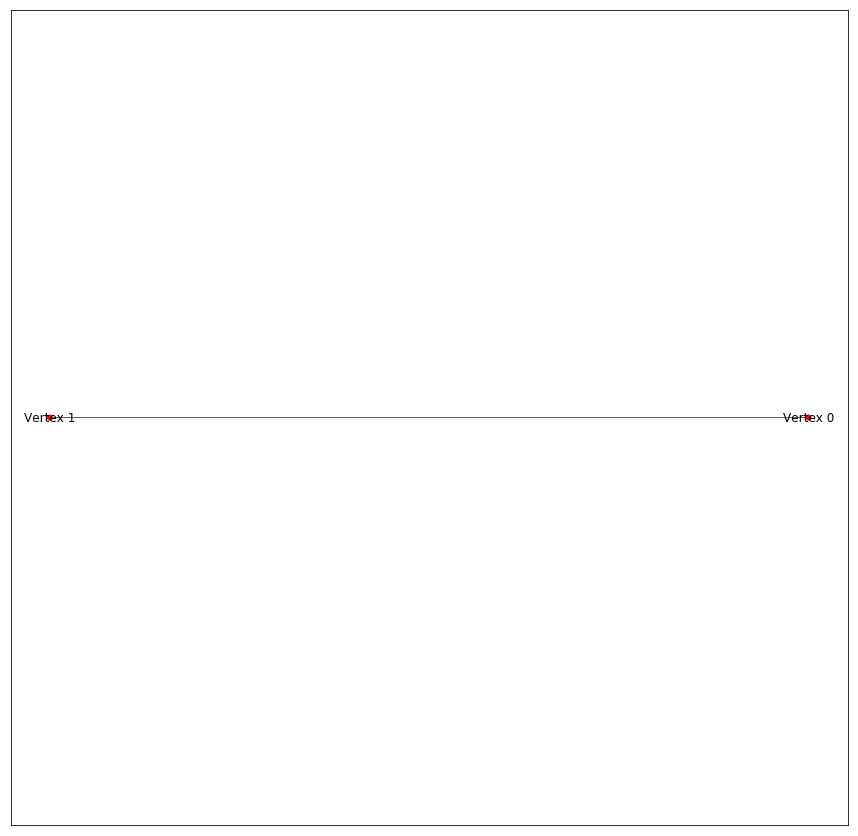

"NON-GROWTH"
Largest component size: [20]
graph density: [0.10526315789473684], 

average path length: 1.894736842105263, 

diameter: 2, 

second eigenvalue: (1+0j) 

total structural util: 3.439062500000002 

is bipartite: False 

avg nbor overlap: [8.65]



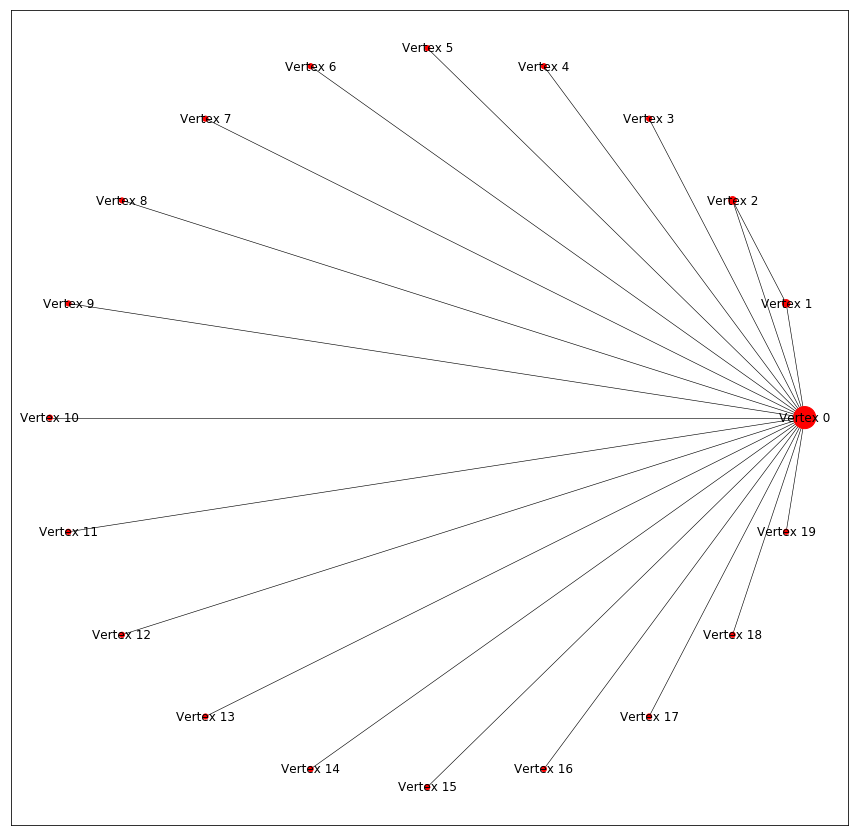

"GROWTH"
Largest component size: [7]
graph density: [1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1666666666666665+0j) 

total structural util: 5.874348958333332 

is bipartite: False 

avg nbor overlap: [15.0]



/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1269: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


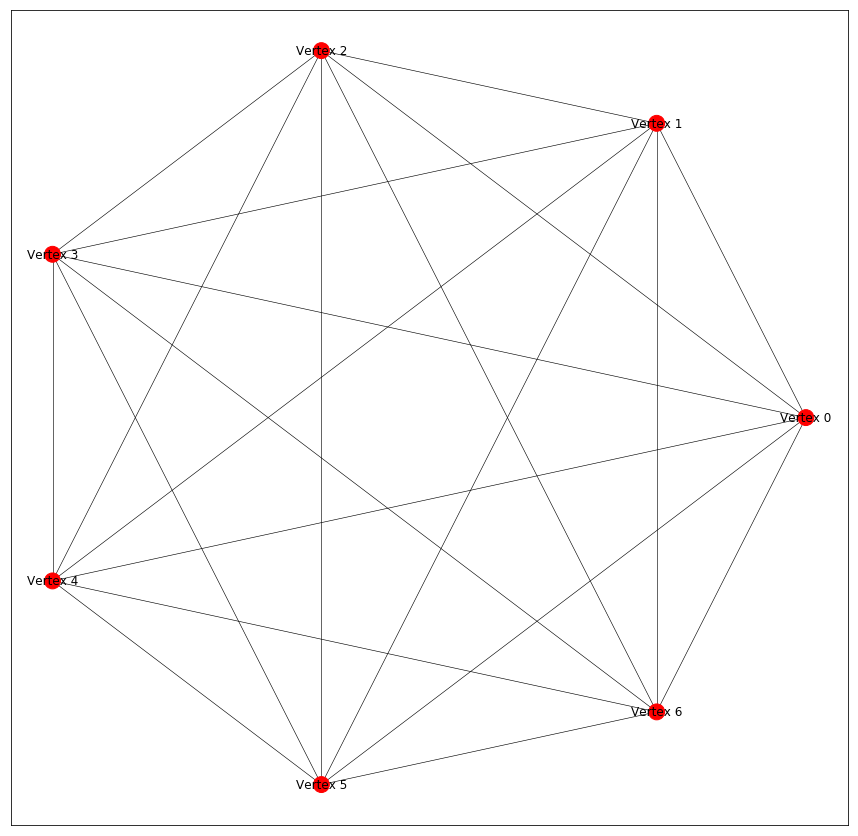

"NON-GROWTH"
Largest component size: [20]
graph density: [0.4631578947368421], 

average path length: 1.6210526315789473, 

diameter: 3, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 28.238541666666663 

is bipartite: False 

avg nbor overlap: [45.95]



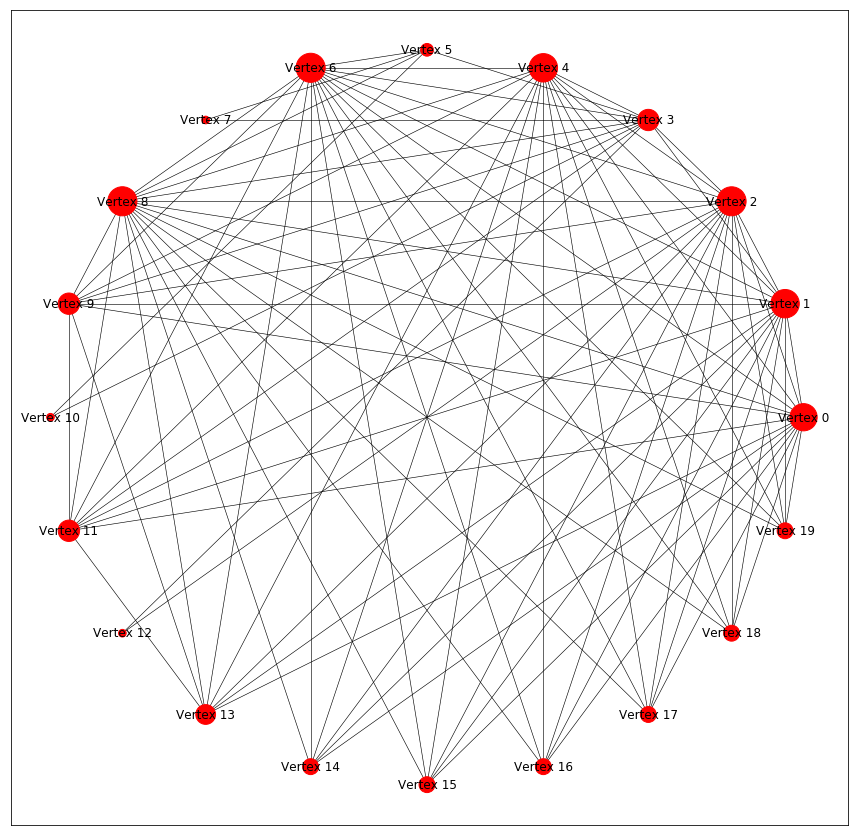

"GROWTH"
Largest component size: [12]
graph density: [0.7121212121212122], 

average path length: 1.2878787878787878, 

diameter: 2, 

second eigenvalue: (1.1111111111111112-6.705509349398019e-17j) 

total structural util: 15.925130208333336 

is bipartite: False 

avg nbor overlap: [31.583333333333332]



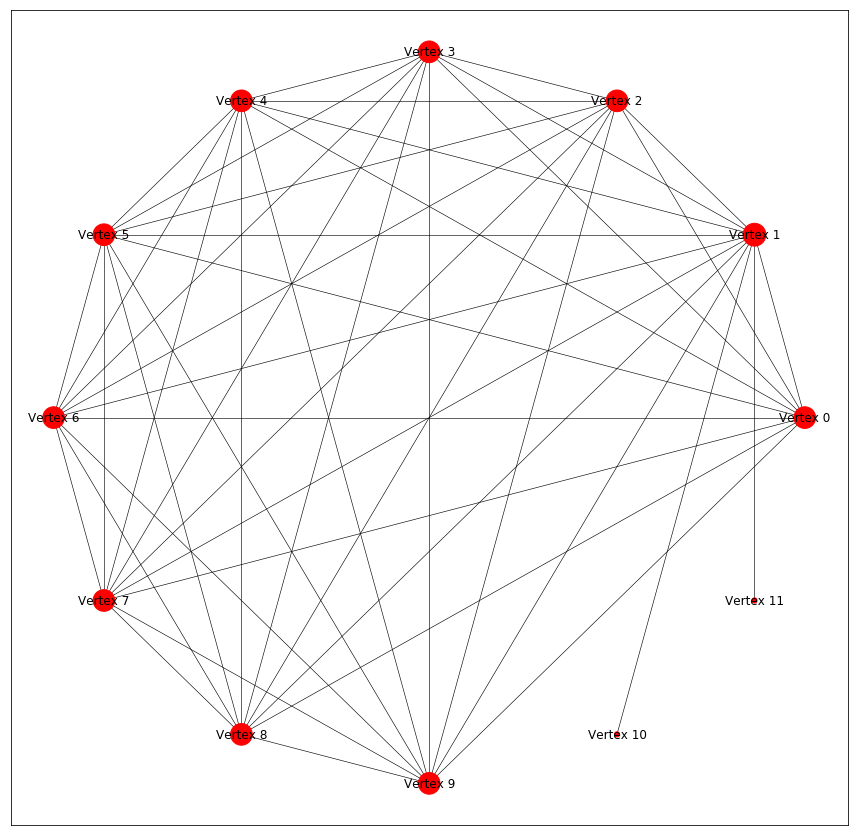

"NON-GROWTH"
Largest component size: [20]
graph density: [0.4631578947368421], 

average path length: 1.8210526315789475, 

diameter: 3, 

second eigenvalue: (1.1719976332500852+0j) 

total structural util: 28.971874999999997 

is bipartite: False 

avg nbor overlap: [37.7]



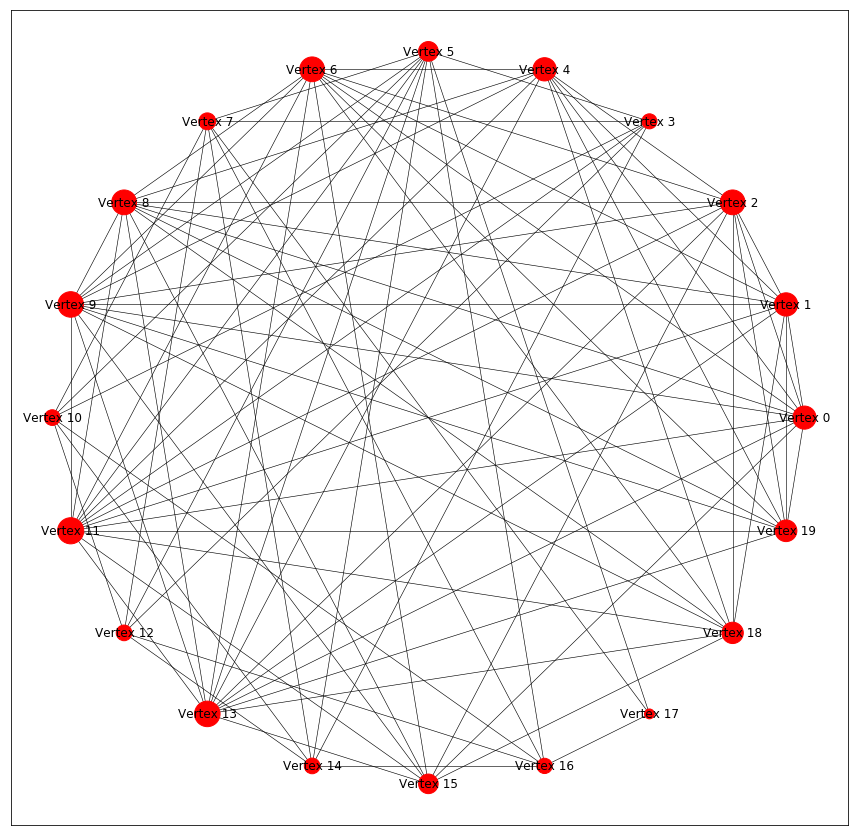

"GROWTH"
Largest component size: [17]
graph density: [0.4485294117647059], 

average path length: 1.5514705882352942, 

diameter: 2, 

second eigenvalue: (1.1111111111111127+0j) 

total structural util: 19.219140624999998 

is bipartite: False 

avg nbor overlap: [32.470588235294116]



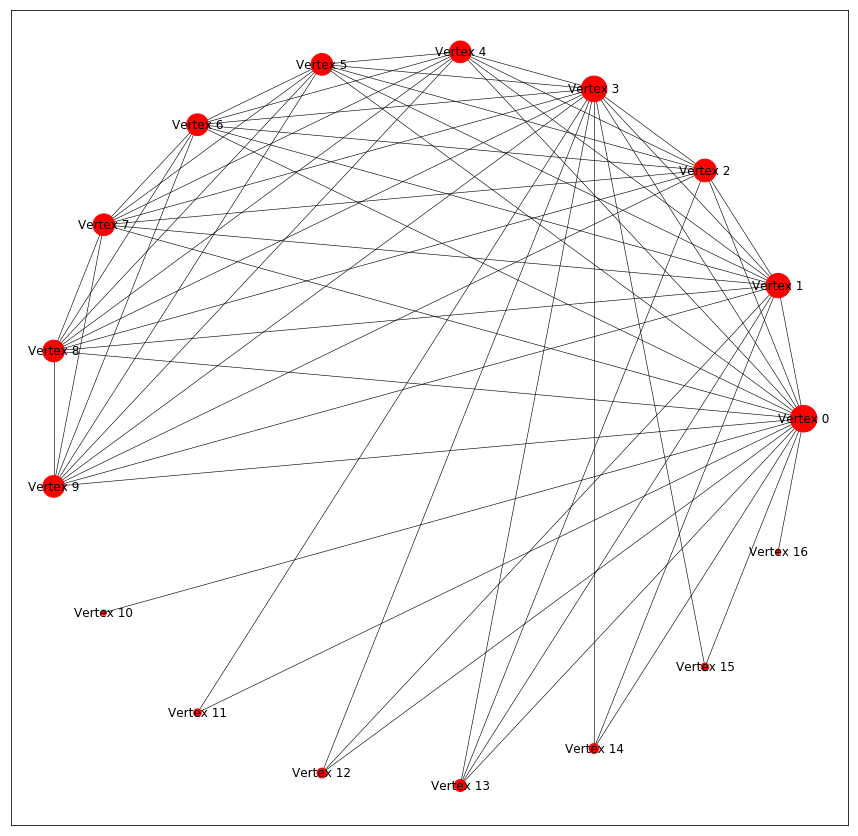

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



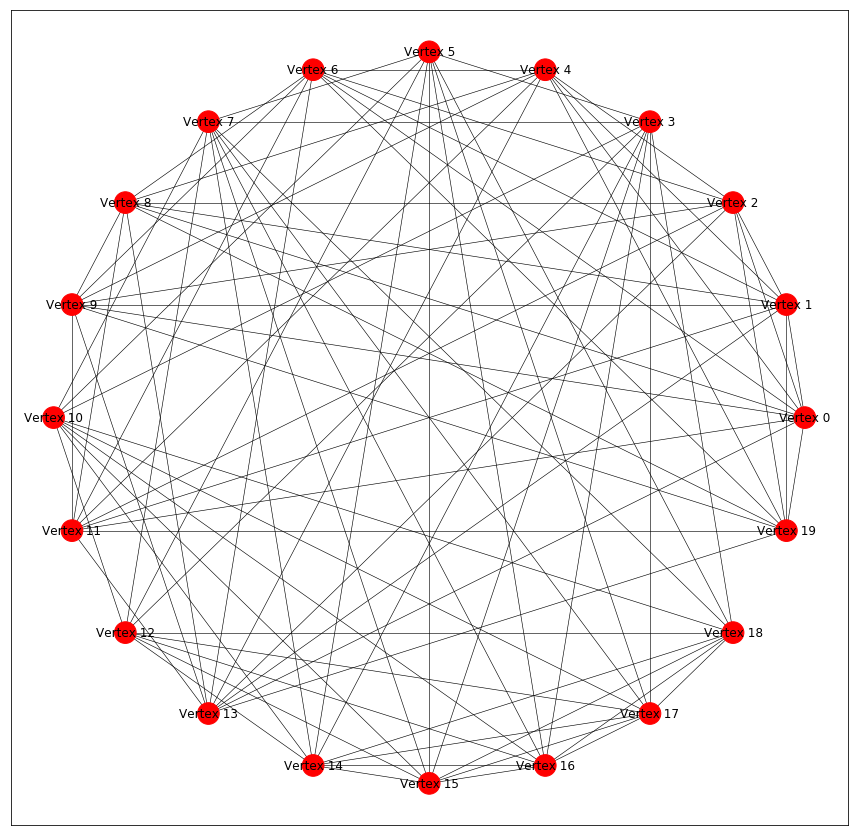

"GROWTH"
Largest component size: [20]
graph density: [0.4421052631578947], 

average path length: 1.5578947368421052, 

diameter: 2, 

second eigenvalue: (1.148011852012758+0j) 

total structural util: 26.764062499999994 

is bipartite: False 

avg nbor overlap: [45.55]



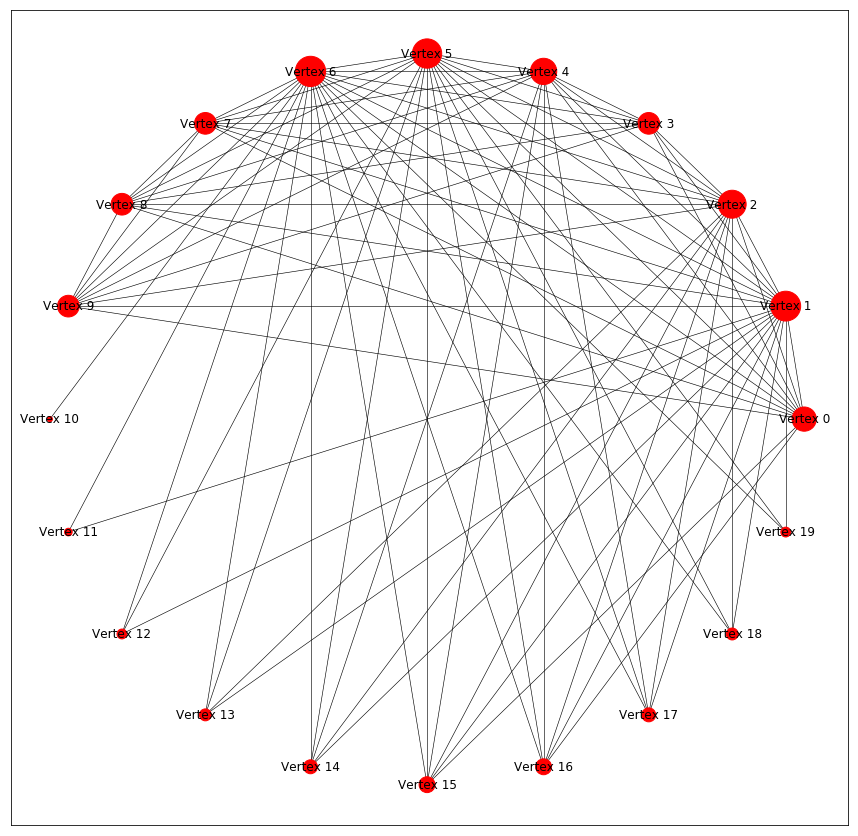

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



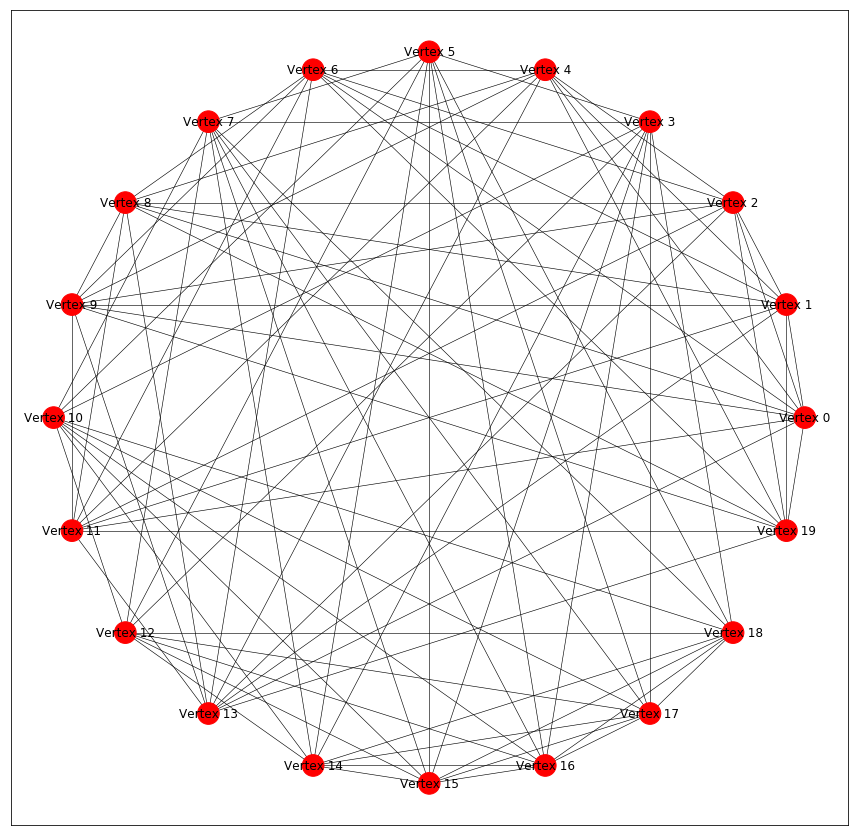

"GROWTH"
Largest component size: [20]
graph density: [0.5157894736842106], 

average path length: 1.4842105263157894, 

diameter: 2, 

second eigenvalue: (1.144493610379142+0j) 

total structural util: 34.391406249999996 

is bipartite: False 

avg nbor overlap: [57.45]



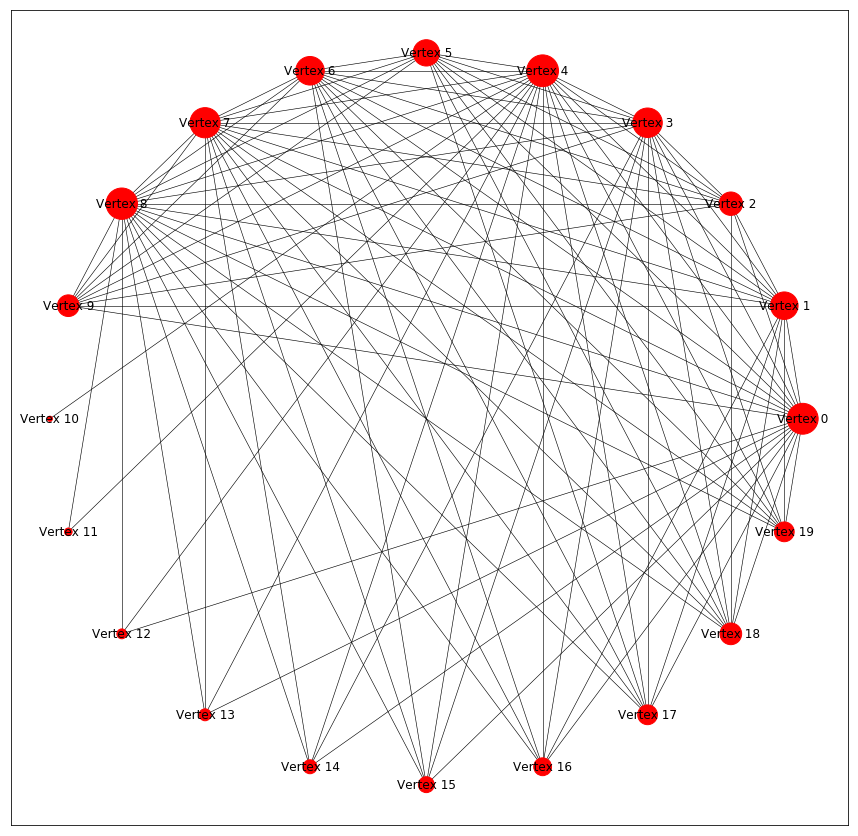

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



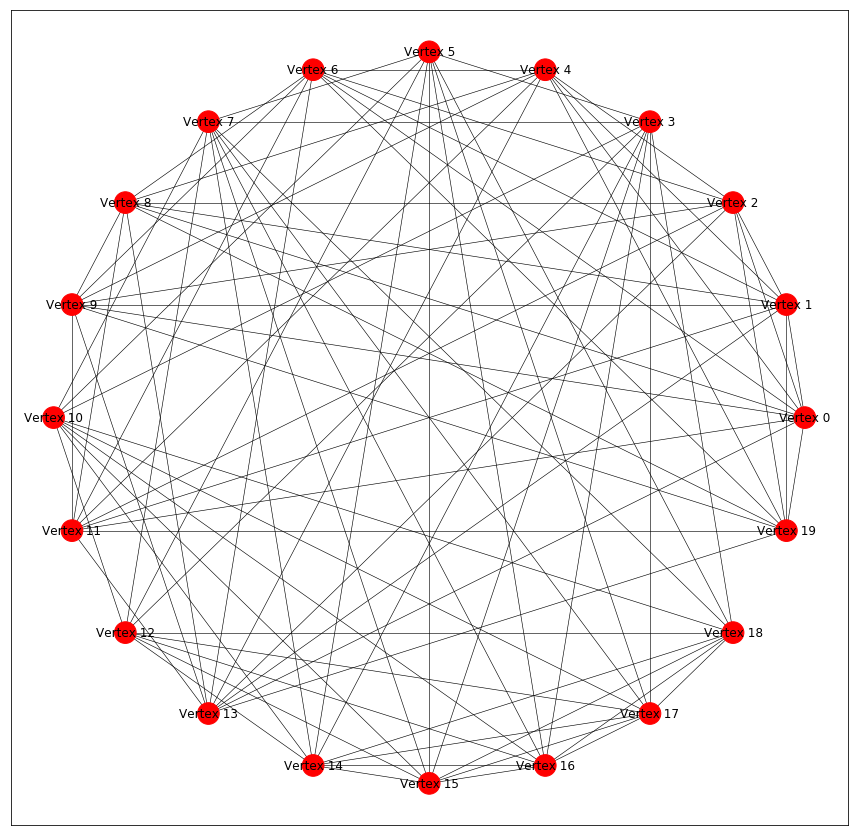

"GROWTH"
Largest component size: [20]
graph density: [0.4789473684210526], 

average path length: 1.7263157894736842, 

diameter: 3, 

second eigenvalue: (1.1904541938031625+0j) 

total structural util: 28.944401041666662 

is bipartite: False 

avg nbor overlap: [39.3]



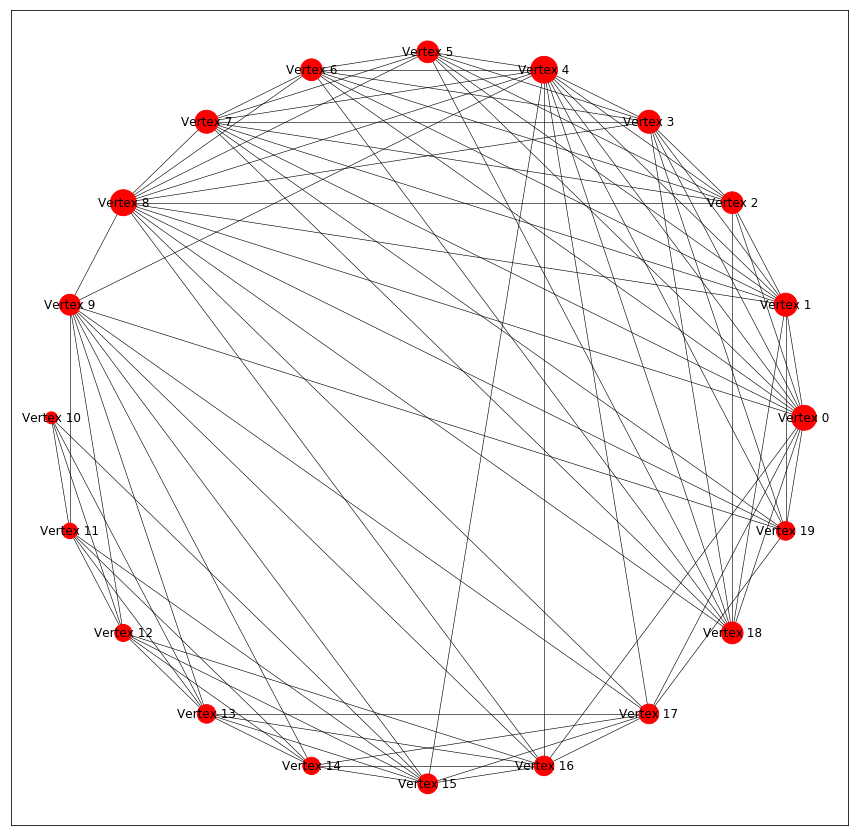

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



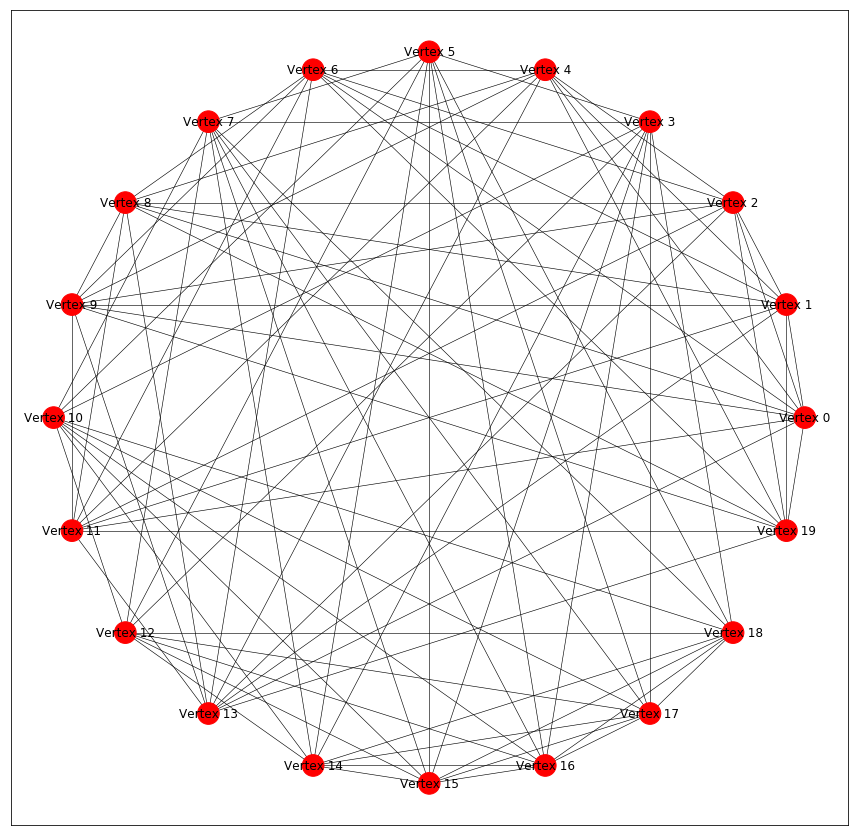

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



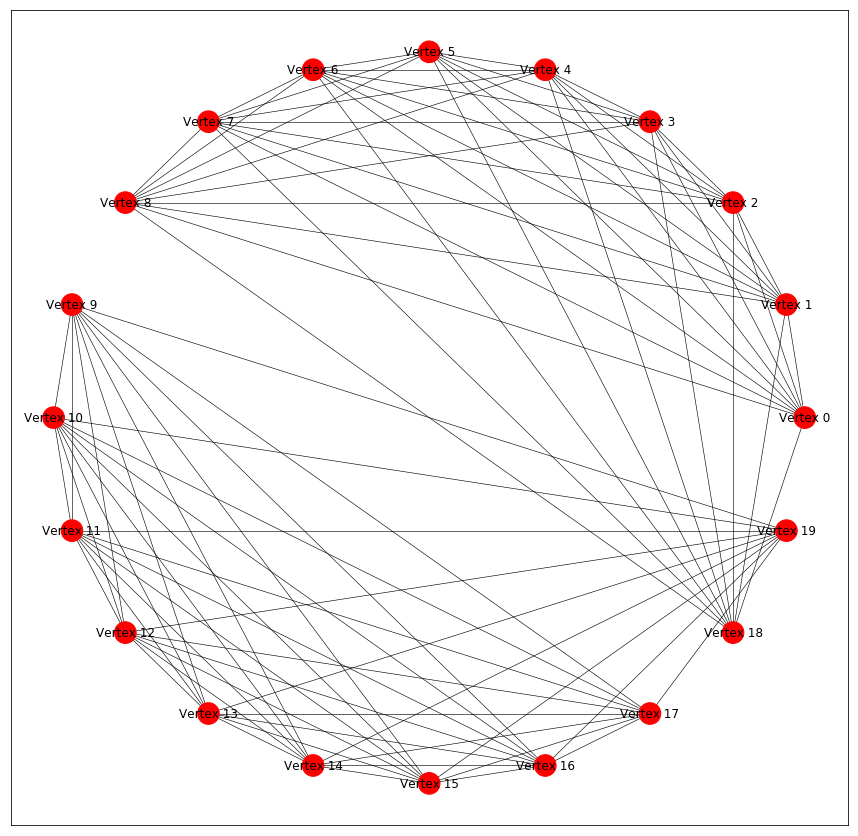

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



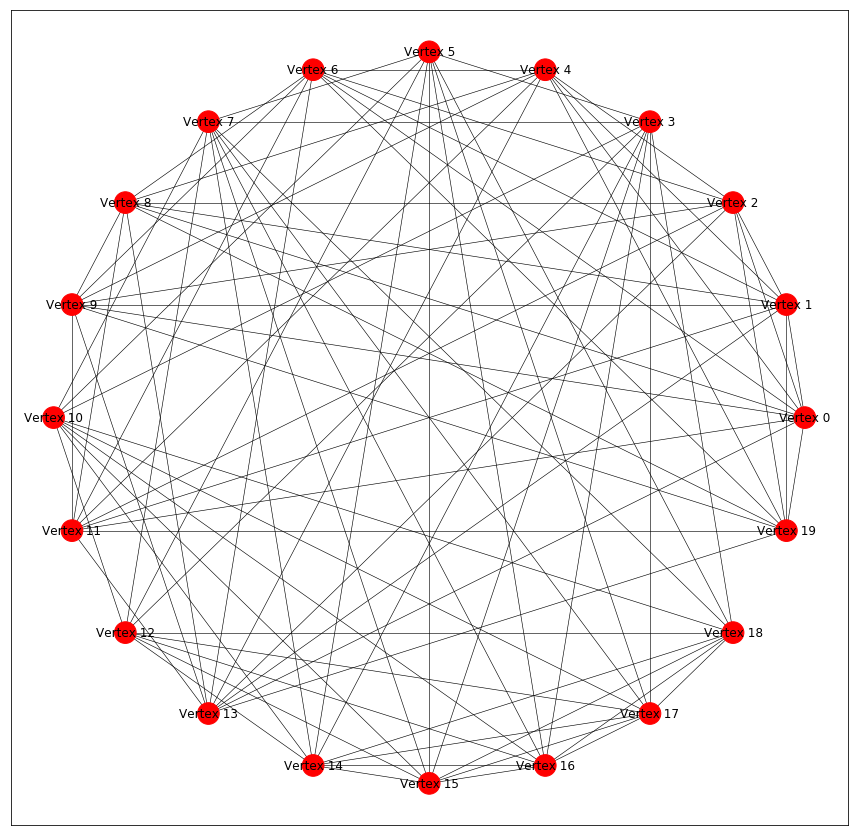

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



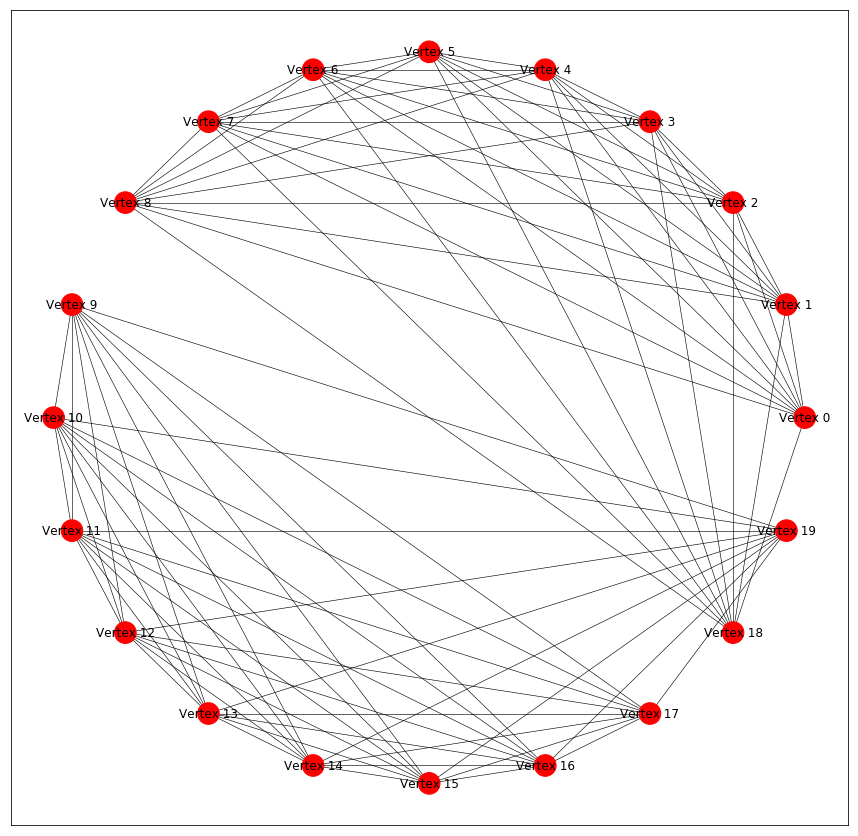

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



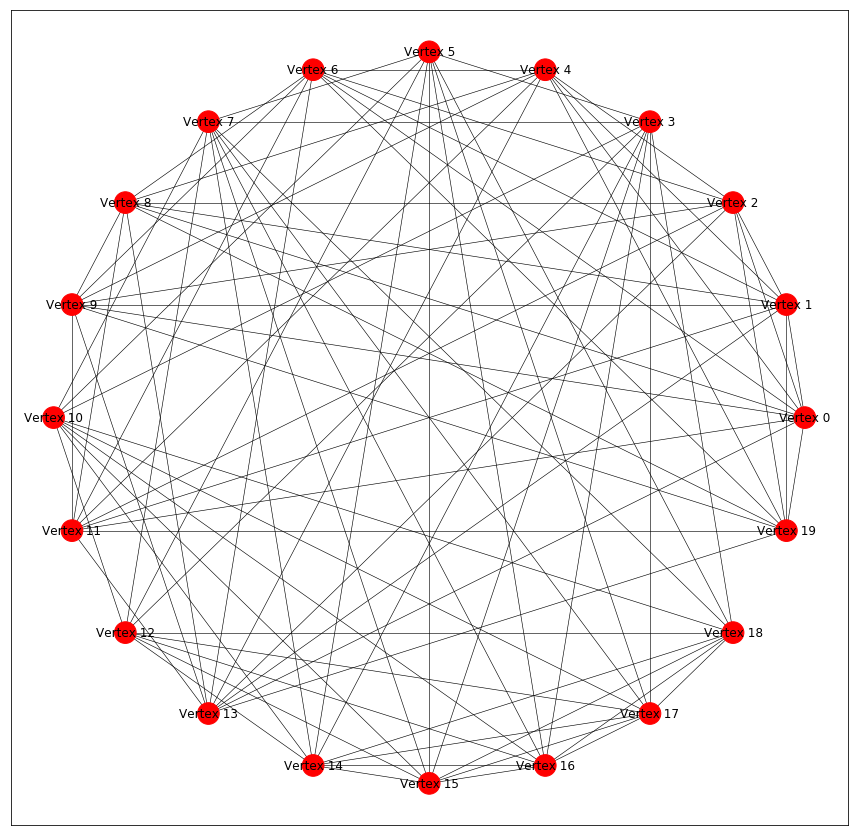

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



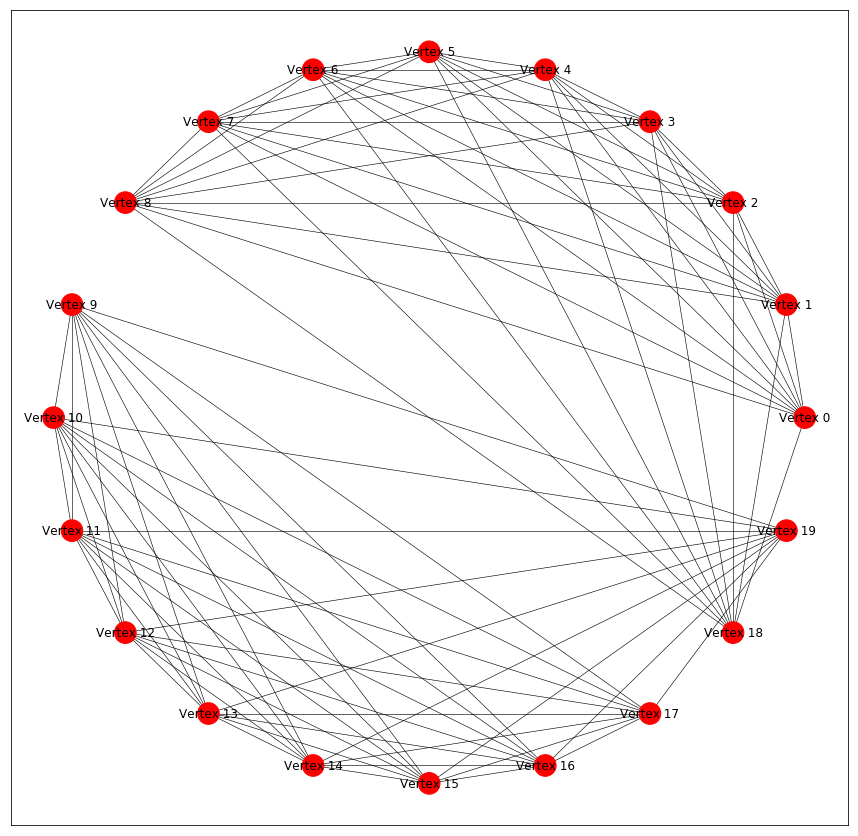

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



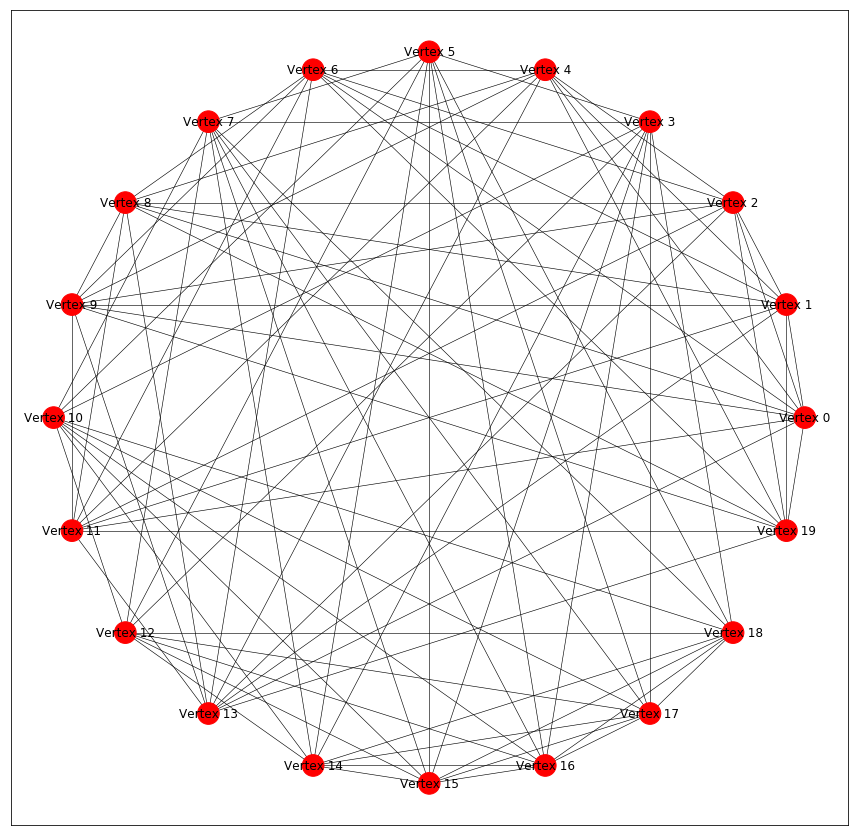

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



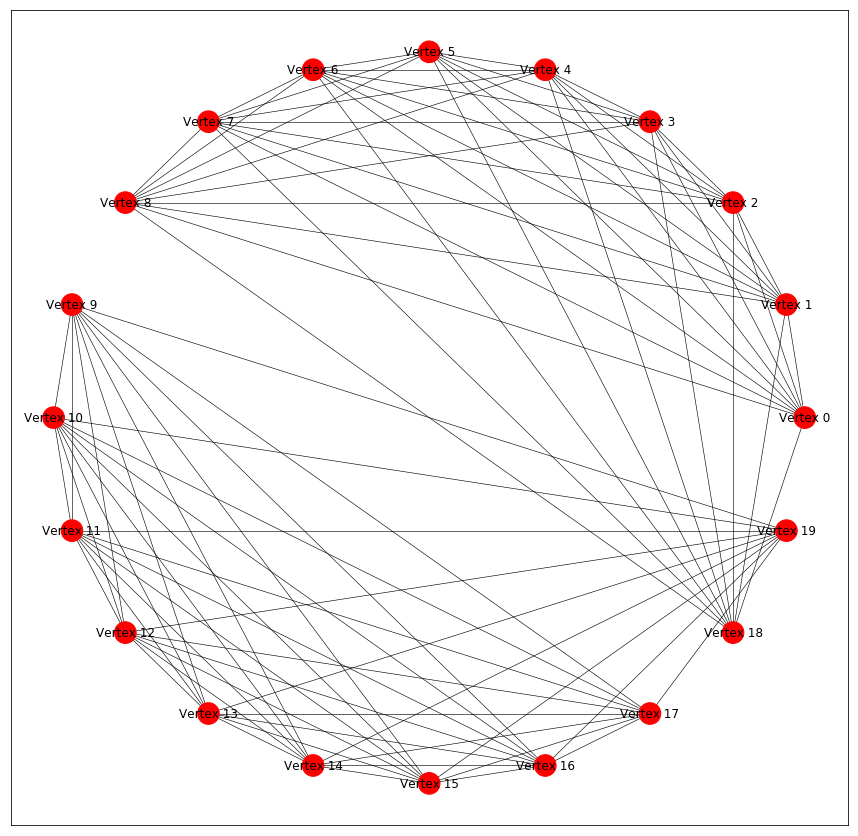

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



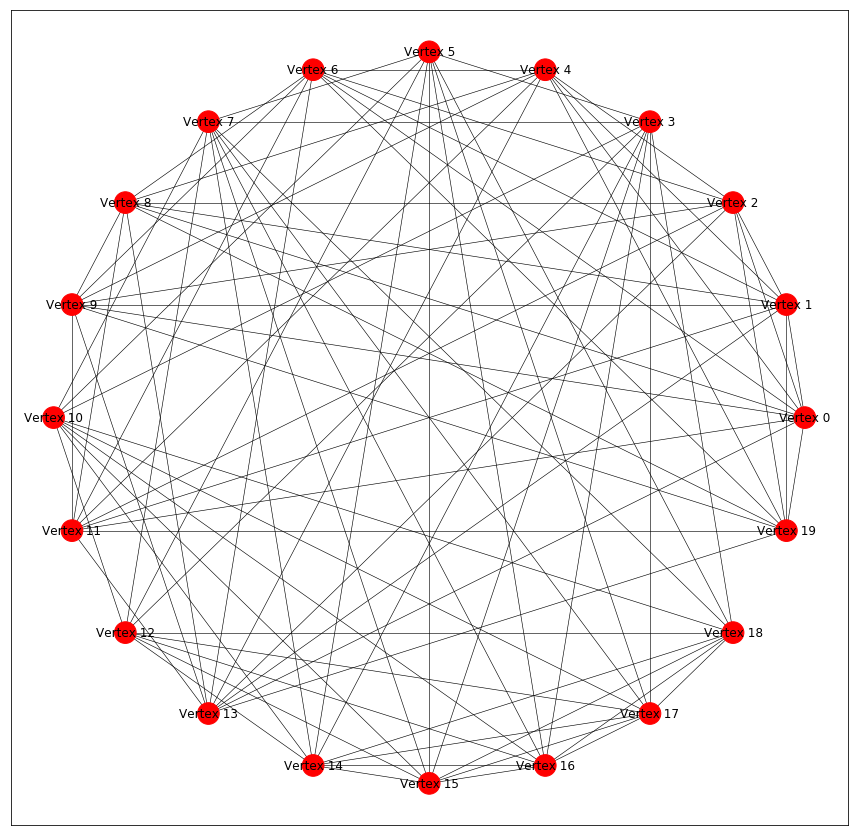

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



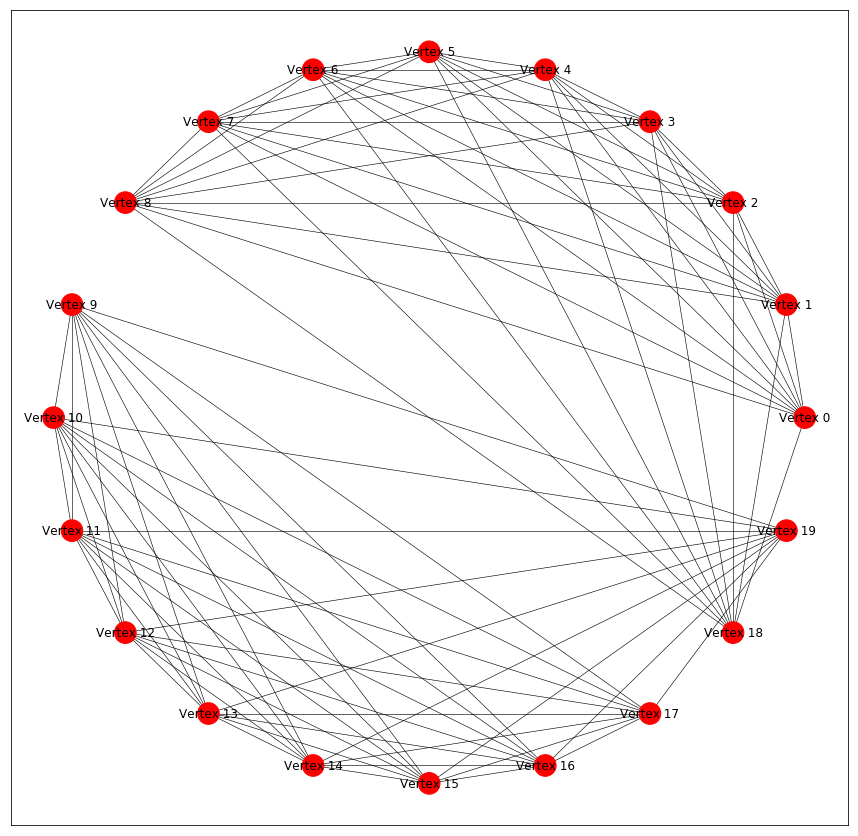

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



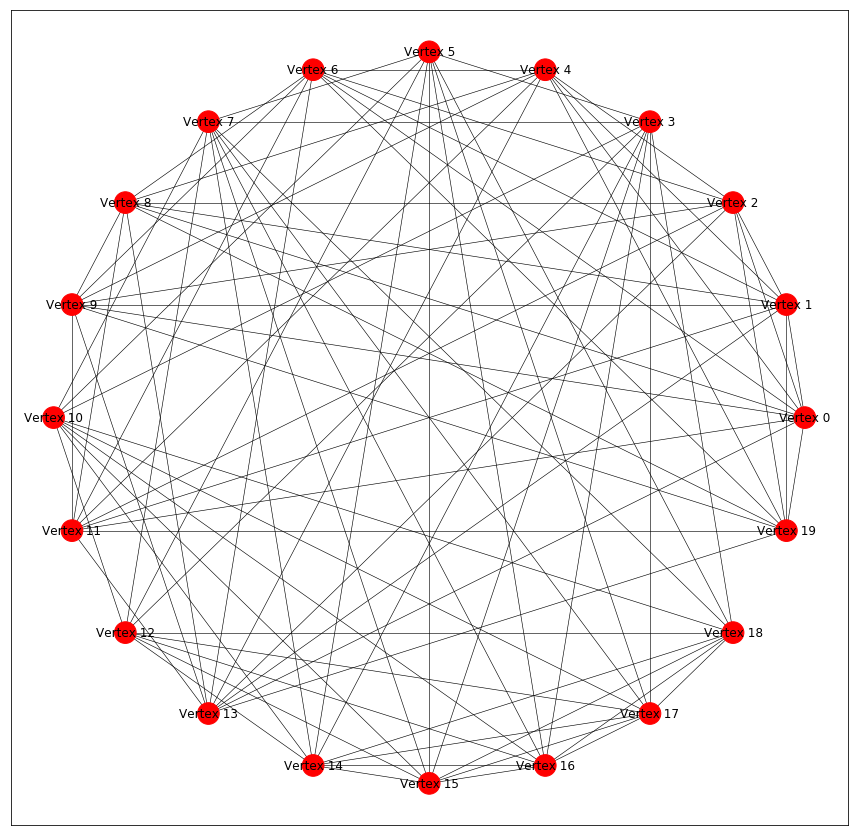

"GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



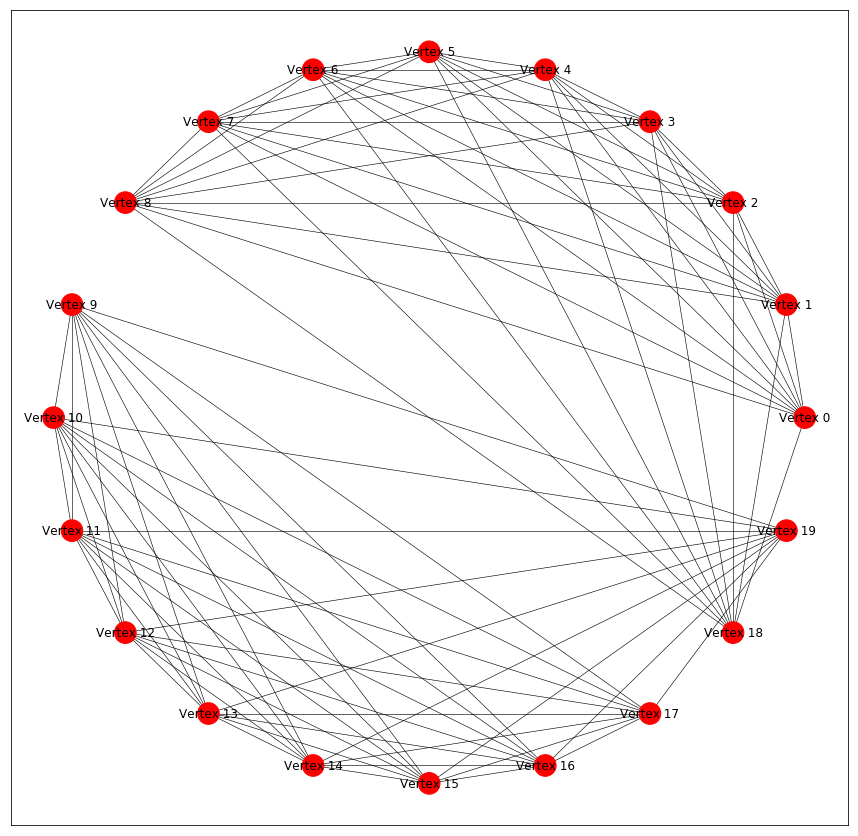

"NON-GROWTH"
Largest component size: [10, 10]
graph density: [1.0, 1.0], 

average path length: 1.0, 

diameter: 1, 

second eigenvalue: (1.1111111111111112+0j) 

total structural util: 31.175781250000007 

is bipartite: False 

avg nbor overlap: [36.0, 36.0]



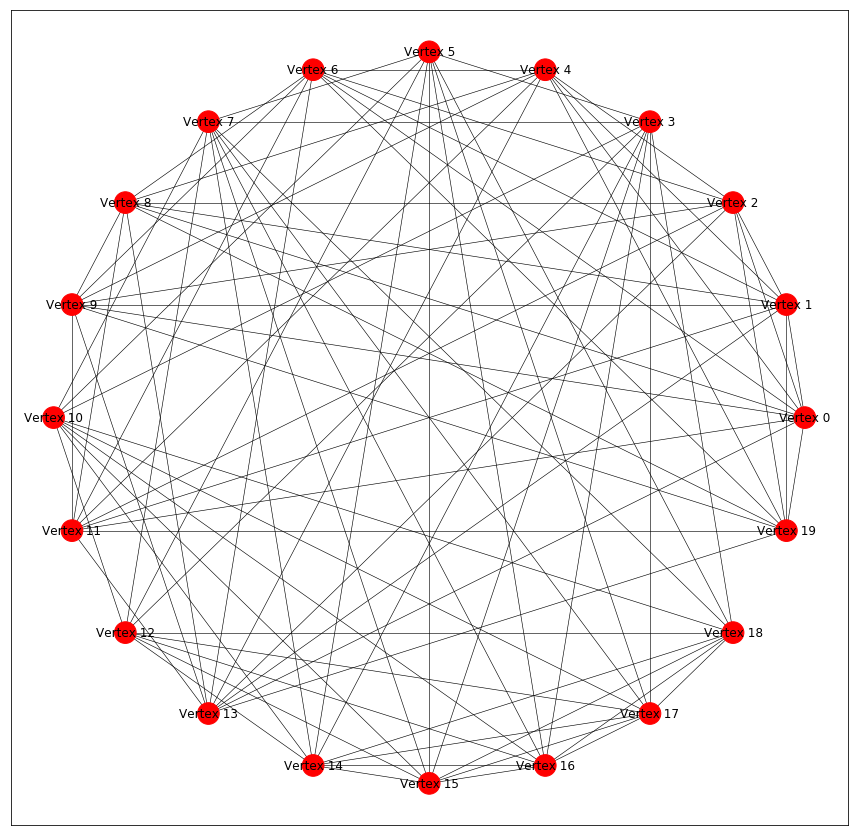

In [4]:
_N_final = 20

# Simul + some vis parameters
num_iters = 50
show_last = 3
show_every = 5

# Non-growth
G_ng = attribute_network(_N_final, params)

# Growth
G_g = attribute_network(1, params)

def run_simul_step(G):
    calc_edges(G)
    simul_random_walk(G)
    for v in [ v for v in G.vertices if v.degree == 0 ]:
        attr_util.indep_context_proposal(G, v)

for itr in range(num_iters):
    if itr < _N_final - 1:
        add_attr_graph_vtx(G_g)
        
    run_simul_step(G_g)
    run_simul_step(G_ng)
    
    if (itr % show_every == 0) or (itr >= num_iters - show_last):
        print("\x1b[95m\"GROWTH\"\x1b[0m")
        print_metrics(G_g)
        vis.draw_graph(G_g)
        
        print("\x1b[95m\"NON-GROWTH\"\x1b[0m")
        print_metrics(G_ng)
        vis.draw_graph(G_ng)

plt.show()